### Import Neeed Library

In [1]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load DataSets

In [2]:
from tensorflow.keras import layers, models
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0


In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

NameError: name 'model' is not defined

In [ ]:
history = model.fit(train_images,train_labels, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7708 - loss: 0.6500 - val_accuracy: 0.8557 - val_loss: 0.4000
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8609 - loss: 0.3890 - val_accuracy: 0.8665 - val_loss: 0.3667
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8749 - loss: 0.3449 - val_accuracy: 0.8682 - val_loss: 0.3529
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8857 - loss: 0.3136 - val_accuracy: 0.8785 - val_loss: 0.3309
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8909 - loss: 0.2973 - val_accuracy: 0.8735 - val_loss: 0.3584


In [ ]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.8678 - loss: 0.3785


[0.37846821546554565, 0.8677999973297119]

### 🔹 Step 1: Build a Simple MLP(Multilayer Perceptron)

In [ ]:
from tensorflow.keras import layers, models
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model

<Sequential name=sequential_5, built=True>

In [ ]:
model.summary()
# Load the Fashion MNIST dataset

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### 🔹 Step 2: Add Dropout and Train

In [ ]:
tf.keras.layers.Dropout(0.2)

<Dropout name=dropout_2, built=True>

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8958 - loss: 0.2824 - val_accuracy: 0.8817 - val_loss: 0.3236
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9004 - loss: 0.2693 - val_accuracy: 0.8840 - val_loss: 0.3259
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9041 - loss: 0.2601 - val_accuracy: 0.8798 - val_loss: 0.3394
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9100 - loss: 0.2446 - val_accuracy: 0.8880 - val_loss: 0.3186
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9130 - loss: 0.2371 - val_accuracy: 0.8768 - val_loss: 0.3496


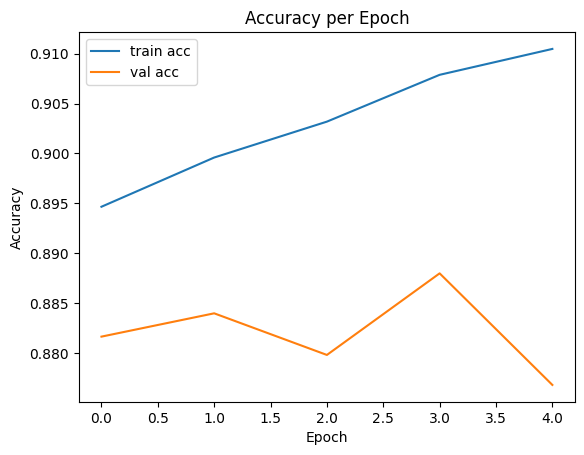

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

# Plot accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
import numpy as np

predictions = model.predict(test_images)

# Show one image with prediction
i = 0
plt.imshow(test_images)[i], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
plt.axis('off')
plt.show()


SyntaxError: unmatched ')' (667203130.py, line 7)